# Proyecto Final Análisis de redes sociales - Magíster en ciencia de datos

Este proyecto debe ser contestado completamente utilizando este archivo de jupyter.


# Parte 1 - Facebook Network [20 puntos]

Junto a este proyecto se dispone de una sección de Facebook en el adjunto, bajo el nombre de `facebook_combined.txt`, responda y argumente su respuesta a las siguientes preguntas sobre esta red. El objetivo será analizar cómo podría generarse una red de este tipo.

# Ejercicio 1.1 [5 puntos]

Compute los siguientes estadísticos:

- Densidad
- Average Clustering coefficient
- Average path length
- Diámetro (Camino más largo entre dos nodos)
- Heterogeneidad

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import pandas as pd

SEED = 2025


In [2]:
def load_data(data='facebook_combined.txt') -> nx.Graph:
    return nx.read_edgelist(data)

def density(G):
    # your code here
    return nx.density(G)
    
def avg_clustering(G):
    # your code here
    return nx.average_clustering(G)
    
def avg_path_len(G):
    # your code here
    if nx.is_connected(G):
        return nx.average_shortest_path_length(G)
    if use_largest_component:
        largest_cc = max(nx.connected_components(G), key=len)
        Gc = G.subgraph(largest_cc).copy()
        return nx.average_shortest_path_length(Gc)
    return float('inf')
    
def diameter(G):
    # your code here
    if nx.is_connected(G):
        return nx.diameter(G)
    if use_largest_component:
        largest_cc = max(nx.connected_components(G), key=len)
        Gc = G.subgraph(largest_cc).copy()
        return nx.diameter(Gc)
    return float('inf')
    
def het(G):
    # your code here
    degrees = np.array([deg for _, deg in G.degree()])
    mean_deg = degrees.mean()
    var_deg = degrees.var()

    if mean_deg == 0:
        return 0
    
    return var_deg / mean_deg
    
def avg_degree(G):
    # your code here
    n = G.number_of_nodes()
    m = G.number_of_edges()
    if n == 0:
        return 0
    return 2 * m / n
    
G = load_data()

# Ejercicio 1.2 [15 puntos]

## 1.2.1

Escriba una rutina que dado un número $n>0$ genere esa cantidad de redes aleatorias "similares" a la red observada (tome como referencia el average clustering).


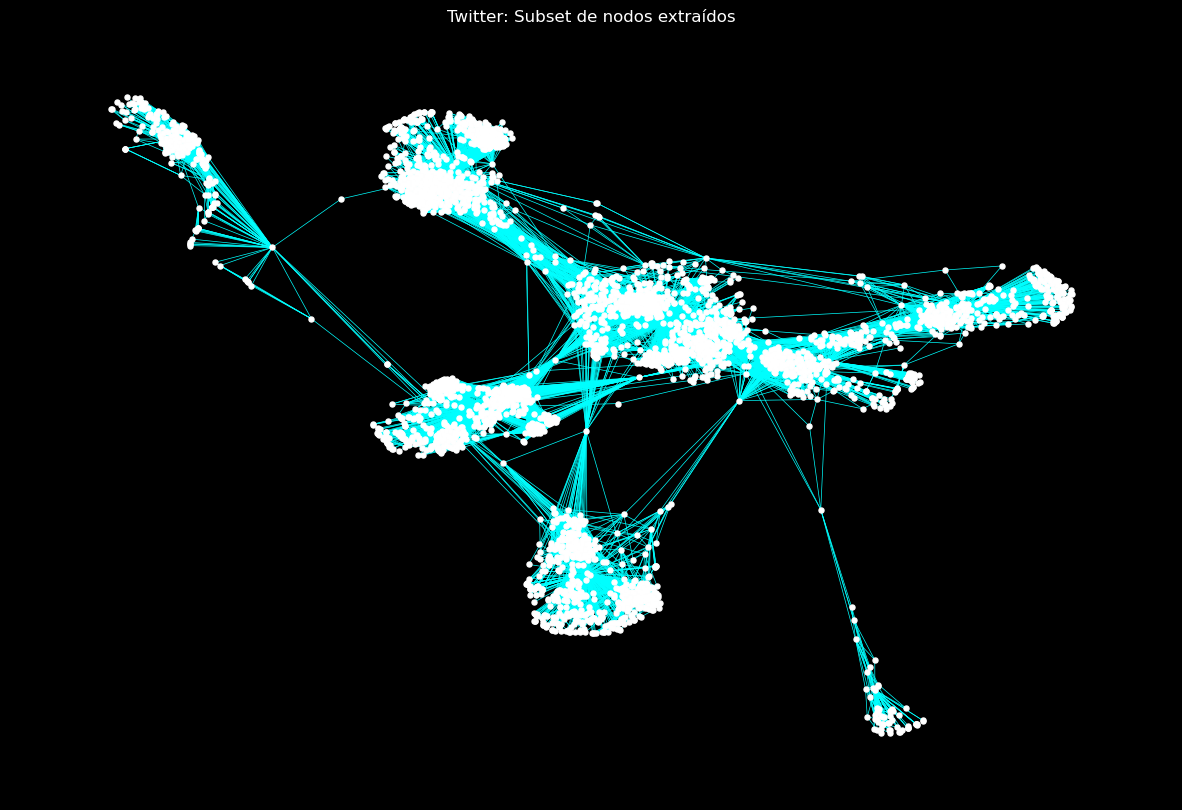

In [3]:
# JUSTIFICACIÓN DE LA ELECCIÓN DEL MODELO

fig, ax = plt.subplots(1, figsize=(15, 10))
nx.draw(
    G,
    with_labels=False,
    node_size=13,
    node_color="white",
    edge_color="cyan",
    width=0.5,
    ax=ax,
)

ax.axis("off")
ax.set_title("Twitter: Subset de nodos extraídos", color="white")
fig.set_facecolor("black")


In [4]:
def random_graph_generator(n):
    # your code here

    G_obs = load_data()
    

    target_clust = nx.average_clustering(G_obs)
    

    num_nodes = G_obs.number_of_nodes()
    num_edges = G_obs.number_of_edges()
    

    approx_k = int(round((2 * num_edges) / num_nodes))

    if approx_k % 2 == 1:
        approx_k += 1
    

    left = 0.0
    right = 1.0
    max_iters = 10
    
    for _ in range(max_iters):
        p_mid = (left + right) / 2.0
        G_tmp = nx.watts_strogatz_graph(num_nodes, approx_k, p_mid)
        clust_mid = nx.average_clustering(G_tmp)
        
        if clust_mid > target_clust:
            left = p_mid
        else:
            right = p_mid
    
    p_final = (left + right) / 2.0
    
    random_graphs = [
        nx.watts_strogatz_graph(num_nodes, approx_k, p_final)
        for _ in range(n)
    ]
    
    return random_graphs

## 1.2.2

Calcule para una muestra rasonable de redes aleatorias la distribución de average clustering coefficient. ¿**Existe** evidencia suficiente para decir que el valor del average clustering coefficient de la red real no se debe a un proceso completamente aleatorio? La función debe retornar True si existe evidencia y False en caso contrario.

In [5]:
def statistical_assert(n, alpha=0.05) -> bool:
    G = load_data()
    # your code here
    G_ref = load_data()
    clustering_ref = avg_clustering(G_ref)

    if n <= 0:
        return False

    sims = random_graph_generator(n)
    simulated_clust = np.array([avg_clustering(H) for H in sims])

    if simulated_clust.size == 0:
        return False

    cutoff = np.quantile(simulated_clust, 1 - alpha)
    return clustering_ref > cutoff